In [13]:
import numpy as np
import matplotlib.pyplot as plt
from rbc_pinn_surrogate.data import RBCDatamodule
from rbc_pinn_surrogate.loss import RBCEquationLoss

ras = [10000, 100000, 1000000]

## Define PINO loss

In [14]:
# pino loss
def setup_pino_loss(dm: RBCDatamodule):
    train_time = dm.hparams.train_length * dm.hparams.stride_time
    kappa = 1 / np.sqrt(dm.hparams.ra * 0.7)
    nu = np.sqrt(0.7 / dm.hparams.ra)
    return RBCEquationLoss(
        domain_width=2 * np.pi,
        domain_height=2,
        time=train_time,
        kappa=kappa,
        nu=nu,
    )

##

## PINO loss for 2D data per split

Calculating PINO loss for Ra = 10000


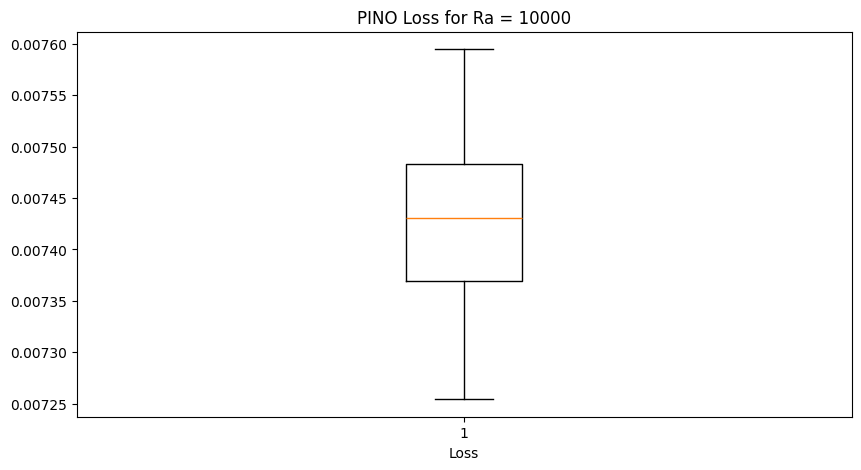

Calculating PINO loss for Ra = 100000


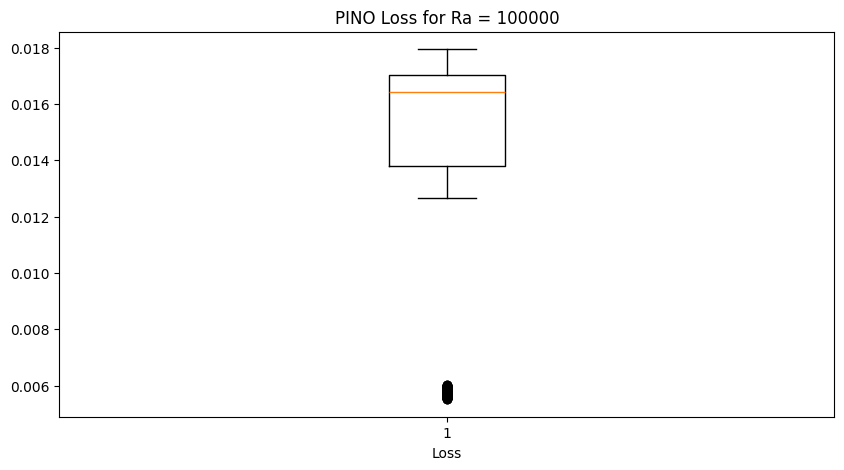

Calculating PINO loss for Ra = 1000000


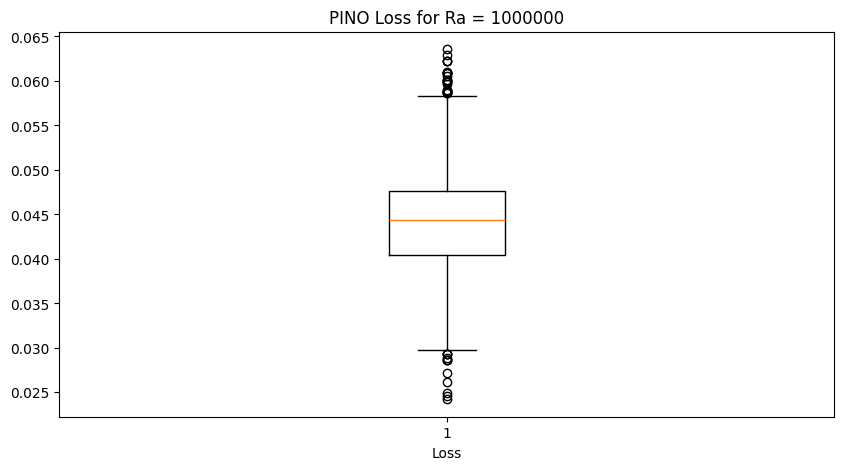

In [ ]:
for ra in ras:
    print(f"Calculating PINO loss for Ra = {ra}")
    dm = RBCDatamodule(
        data_dir="../data/datasets/2D",
        batch_size=1,
        ra=ra,
        pressure=True,
        stride_time=0.5,
        start_time=200,
        end_time=300,
    )
    dm.setup(stage="fit")
    dm.setup(stage="test")
    pino_loss = setup_pino_loss(dm)

    # iterate over the dataloaders
    loss = []
    for x, y in dm.train_dataloader():
        loss.append(pino_loss(x))

    for x, y in dm.val_dataloader():
        loss.append(pino_loss(x))

    for x, y in dm.test_dataloader():
        loss.append(pino_loss(x))

    # boxplot with matplotlib over loss
    plt.figure(figsize=(10, 5))
    plt.boxplot(loss)
    plt.title(f"PINO Loss for Ra = {ra}")
    plt.xlabel("Loss")
    plt.show()

## PINO loss vs time in test set

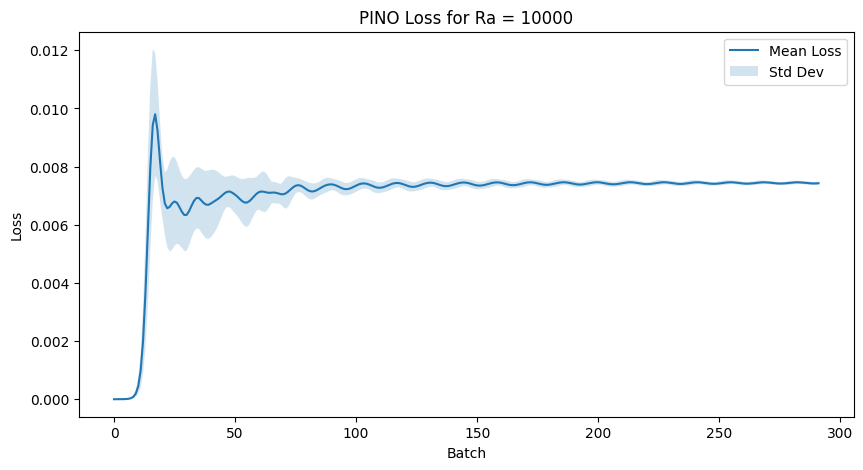

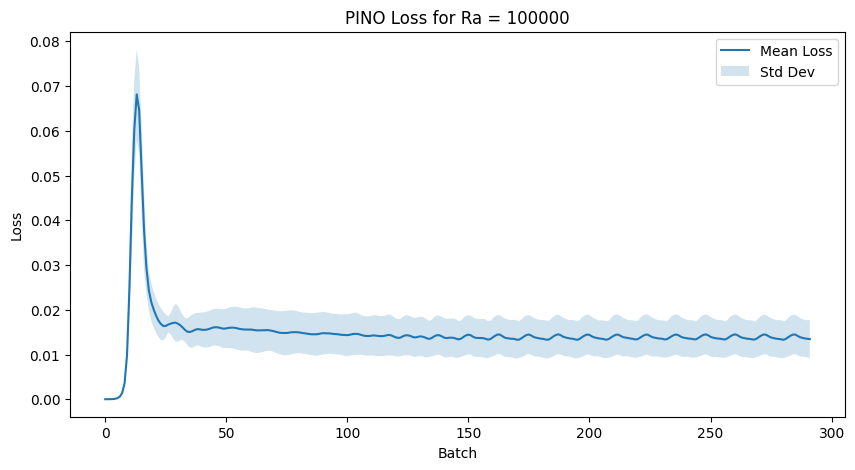

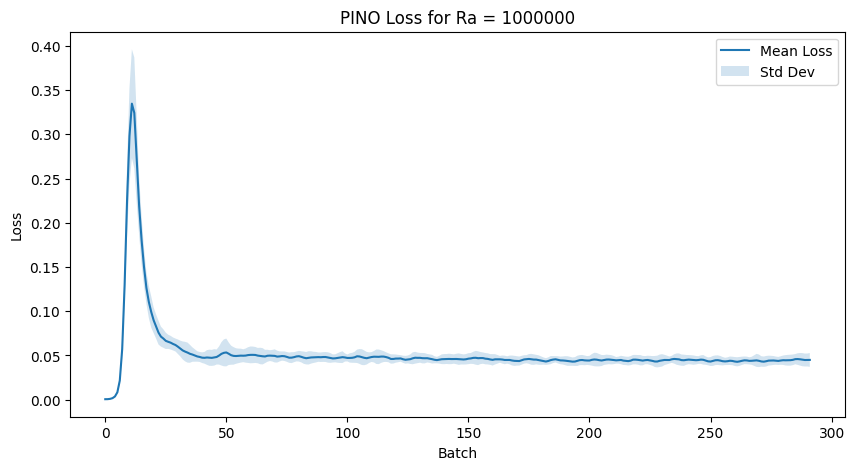

In [15]:
for ra in ras:
    dm = RBCDatamodule(
        data_dir="../data/datasets/2D",
        batch_size=1,
        ra=ra,
        pressure=True,
        stride_time=0.5,
        start_time=1,
        end_time=301,
    )
    dm.setup(stage="test")
    pino_loss = setup_pino_loss(dm)

    # iterate over the dataloaders
    loss = []
    for x, y in dm.test_dataloader():
        loss.append(pino_loss(x))

    length = 300 - 8
    # split loss list into sublists of 300 elements
    loss = np.array(loss).reshape(-1, length)
    # calculate mean loss for each batch
    mean = np.mean(loss, axis=0)
    std = np.std(loss, axis=0)

    # plot loss vs batch
    plt.figure(figsize=(10, 5))
    plt.plot(mean, label="Mean Loss")
    plt.fill_between(
        np.arange(len(mean)), mean - std, mean + std, alpha=0.2, label="Std Dev"
    )
    plt.title(f"PINO Loss for Ra = {ra}")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()